# **Iporting Libraries and Dataset(FASHION MNIST)**

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# **الف) Printing the number of classes:**

In [6]:
print(np.unique(train_labels))
print(f"Number of CLASSES: {len(np.unique(train_labels))}")

[0 1 2 3 4 5 6 7 8 9]
Number of CLASSES: 10


# **ب) Printing some of the images in dataset:**

Label 10th image is:


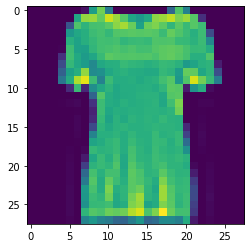

Label 11th image is:


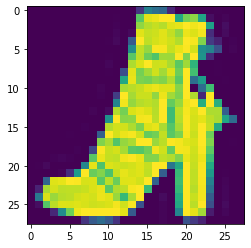

Label 12th image is:


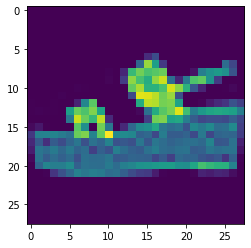

In [ ]:
# showing some of images in dataset
for i in range(10,13):
  print(f"Label {i}th image is:")
  plt.imshow(train_images[i])
  plt.show()

# **ج)**

**--->** Maximum is around 250 till 255 so we divide train_images and also test_images to 255 **for Normalizing**

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**---> One hotting** 

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
#Check data Type
print ("\ttype(x_train): {}".format(type(train_images)))
print ("\ttype(y_train): {}".format(type(train_labels)))
#check data Shape
print ("\tx_train.shape: {}".format(np.shape(train_images)))
print ("\ty_train.shape: {}".format(np.shape(train_labels)))
print ("\tx_test.shape: {}".format(np.shape(test_images)))
print ("\ty_test.shape: {}".format(np.shape(test_labels)))
#sample data
print ("\ty_train[0]: {}".format(train_labels[0]))

	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (60000, 28, 28)
	y_train.shape: (60000, 10)
	x_test.shape: (10000, 28, 28)
	y_test.shape: (10000, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**--->** changing data to **float32** 

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# **د)**

**---> Model Architecture**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5037 - accuracy: 0.8239
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3743 - accuracy: 0.8665
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8772
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8856
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.8926
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8956
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9003
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9051
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9072
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [ ]:
results = model.evaluate(test_images, test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8889
Final test set loss: 0.342463
Final test set accuracy: 0.888900
